Prevendo valores de ações com algoritmos de machine learning e deep learning 🎯´



# Bibliotecas

In [2]:
# Bibliotecas básicas de data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

# Para baixar os dados
import yfinance as yf


#Para aplicar o ARIMA:
from statsmodels.tsa.stattools import adfuller          #verificar dados estacionários
from statsmodels.tsa.stattools import acf, pacf         #correlação
from statsmodels.tsa.seasonal import seasonal_decompose #Decomposição sazonal usando médias móveis.
from statsmodels.tsa.arima.model import ARIMA           #algoritmo arima

# Para deep learning
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator

# Para machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Prophet
from prophet import Prophet

# Upload do dataframe Bolsa

In [3]:
# Especifique o símbolo da Bolsa ^BVSP e o intervalo de datas desejado
symbol = '^BVSP'
start_date = '2018-01-01'
end_date = '2024-01-20'

# Use a função download para obter os dados
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df = df.reset_index('Date')
df['Date'] = pd.to_datetime(df['Date']) #realizando a conversão da data para formato datetime
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,77891.0,2880300
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,77995.0,3142200
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,78647.0,3486100
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,79071.0,2747100
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,79379.0,2550800


In [5]:
df.shape #analisando linhas e colunas

(1500, 7)

In [6]:
df_bolsa = df # criando cópia do dataset

# Visualizando os valores de fechamento

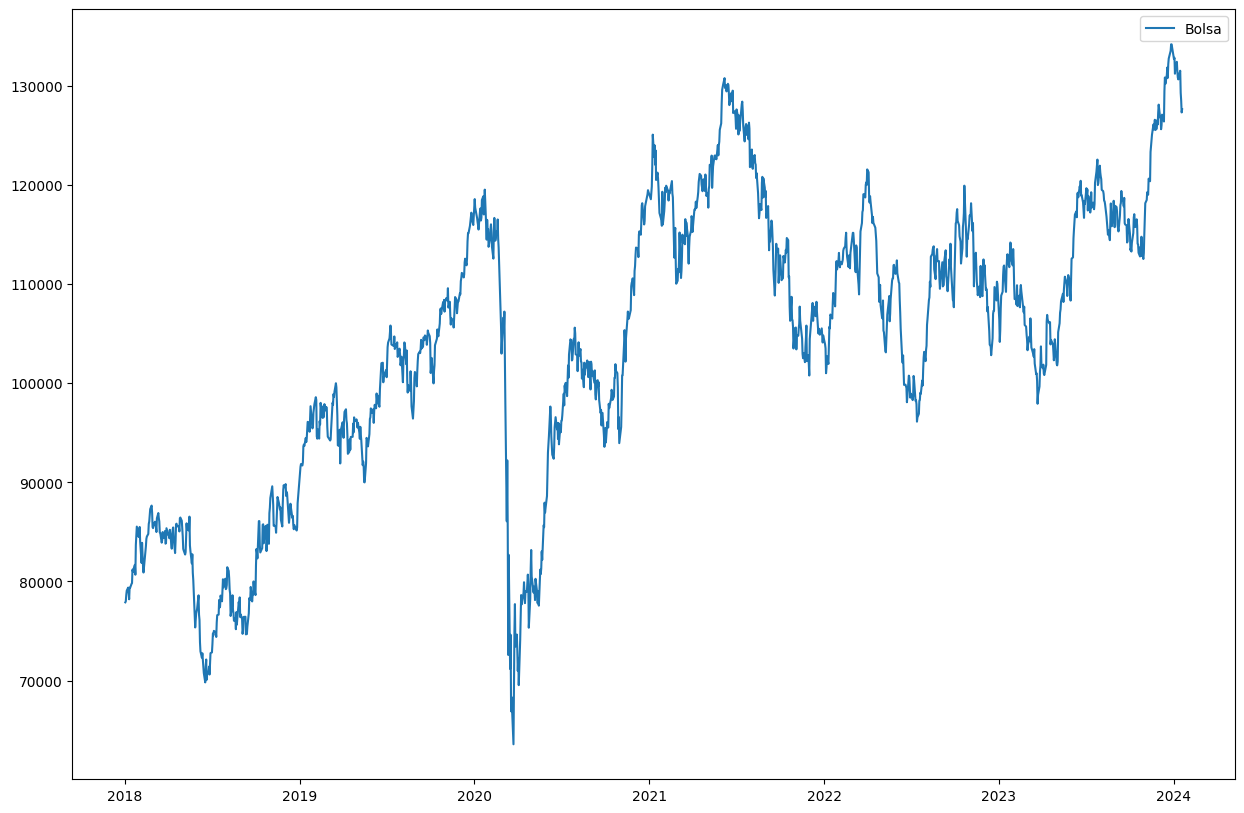

In [7]:
plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Close'], label='Bolsa')

plt.legend(loc='best')
plt.show()

# Análise de série temporal (Decomposição)
Utilizamos o Statsmodel para decompor nossos dados e visualizar vários gráficos.


**Tendência**
Direcionamento de sua série temporal (para qual direção ela está indo).

**Sazonalidade**
Encontrar caracteristicas e padrões no tempo que podem aparecer de forma repetida.

**Ruído**
Após extrair a tendência e a sazonalidade da série original, o que resta é chamado de resíduo. Os resíduos são a diferença entre a série original e o que foi explicado pela tendência e sazonalidade.

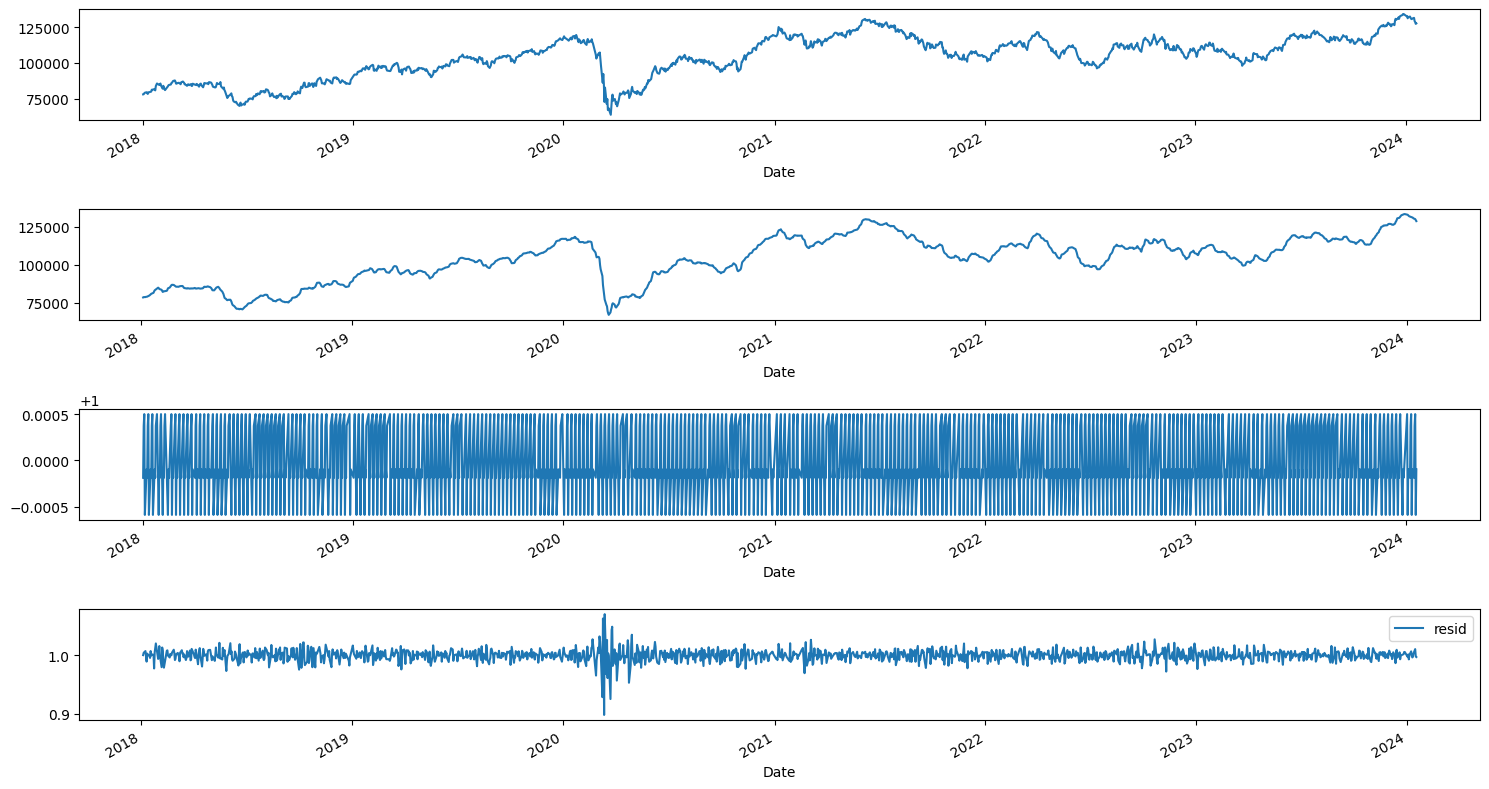

In [17]:

# Aqui a decomposição foi realizada no Data Frame inteiro de 2018 a 2024


from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_limpo = df                                                              # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])                        # transformando em datetime
df_limpo = df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])# Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')                                      # definindo data como índice

################################## Notas da análise de decomposição da série ########################################

# model='additive': Este parâmetro especifica o tipo de modelo utilizado na decomposição.

# Os dois tipos principais são:

# "additive" (modelo apropriado quando a magnitude da sazonalidade não varia com a tendência)
# "multiplicative" (modelo é mais apropriado quando a magnitude da sazonalidade varia com a tendência).

# period: Este é o período da sazonalidade. Ele especifica o número de observações em um ciclo sazonal.

######################################################################################################################

seasonplot = seasonal_decompose(df_limpo, model='multiplicative', period=5) #decopondo a série temporal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1) #serie real
seasonplot.trend.plot(ax=ax2)    #tendencia
seasonplot.seasonal.plot(ax=ax3) #sazonalidade
seasonplot.resid.plot(ax=ax4)    #residuos
plt.legend(loc='best')
plt.tight_layout()

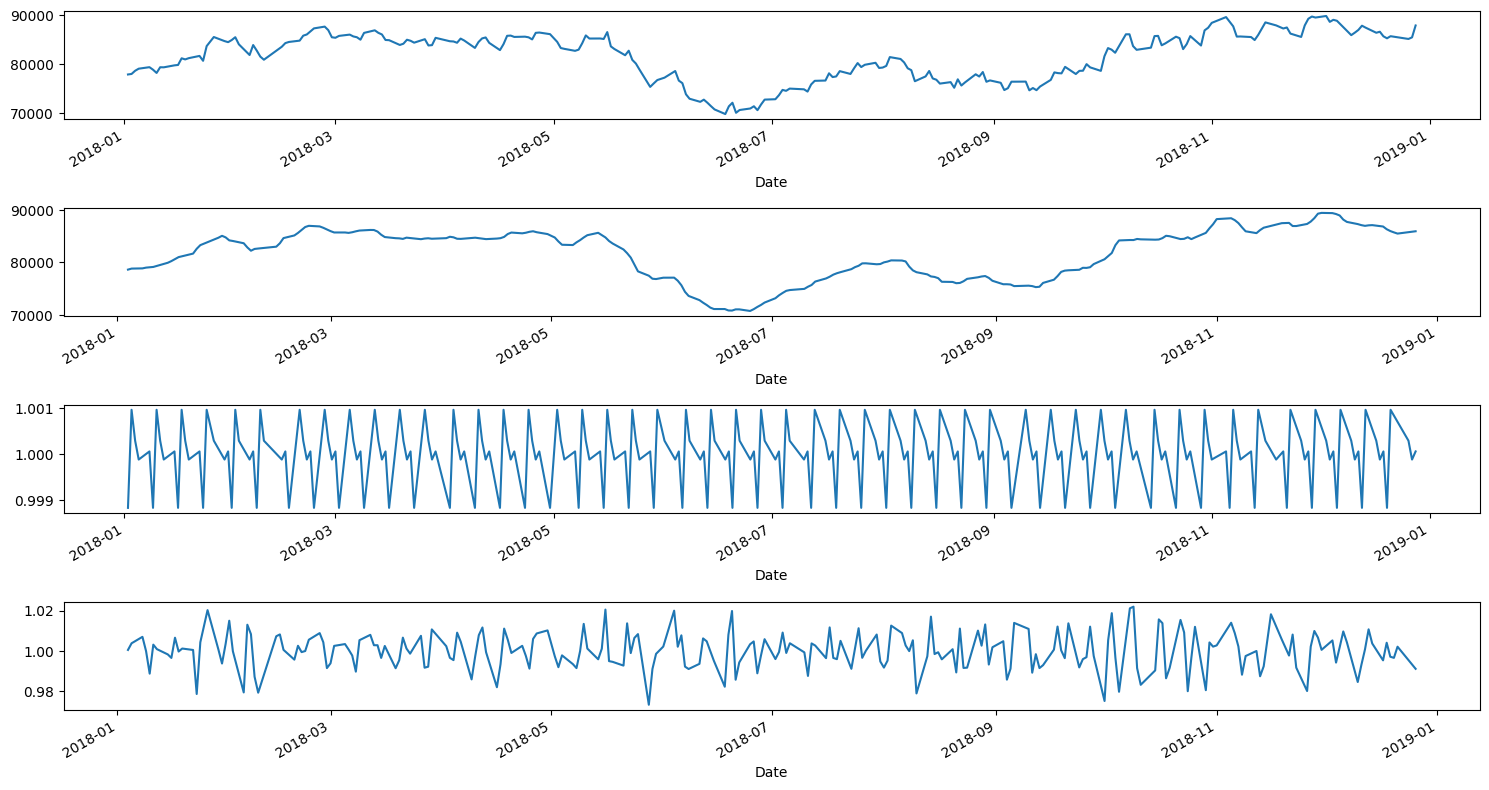

In [ ]:

# Aqui a decomposição foi realizada no ano de 2018

df_limpo = df.copy()  # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])  # transformando em datetime
df_limpo = df_limpo.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])  # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')  # definindo data como índice

# Filtrando por datas desejadas (por exemplo, de '2022-01-01' a '2022-12-31')
data_inicio = '2018-01-01'
data_fim = '2018-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

# Decomposição sazonal nos dados filtrados
seasonplot = seasonal_decompose(df_limpo_filtrado, model='multiplicative', period=5)

# Subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # Série real
seasonplot.trend.plot(ax=ax2)     # Tendência
seasonplot.seasonal.plot(ax=ax3)  # Sazonalidade
seasonplot.resid.plot(ax=ax4)     # Resíduos
plt.tight_layout()

plt.show()


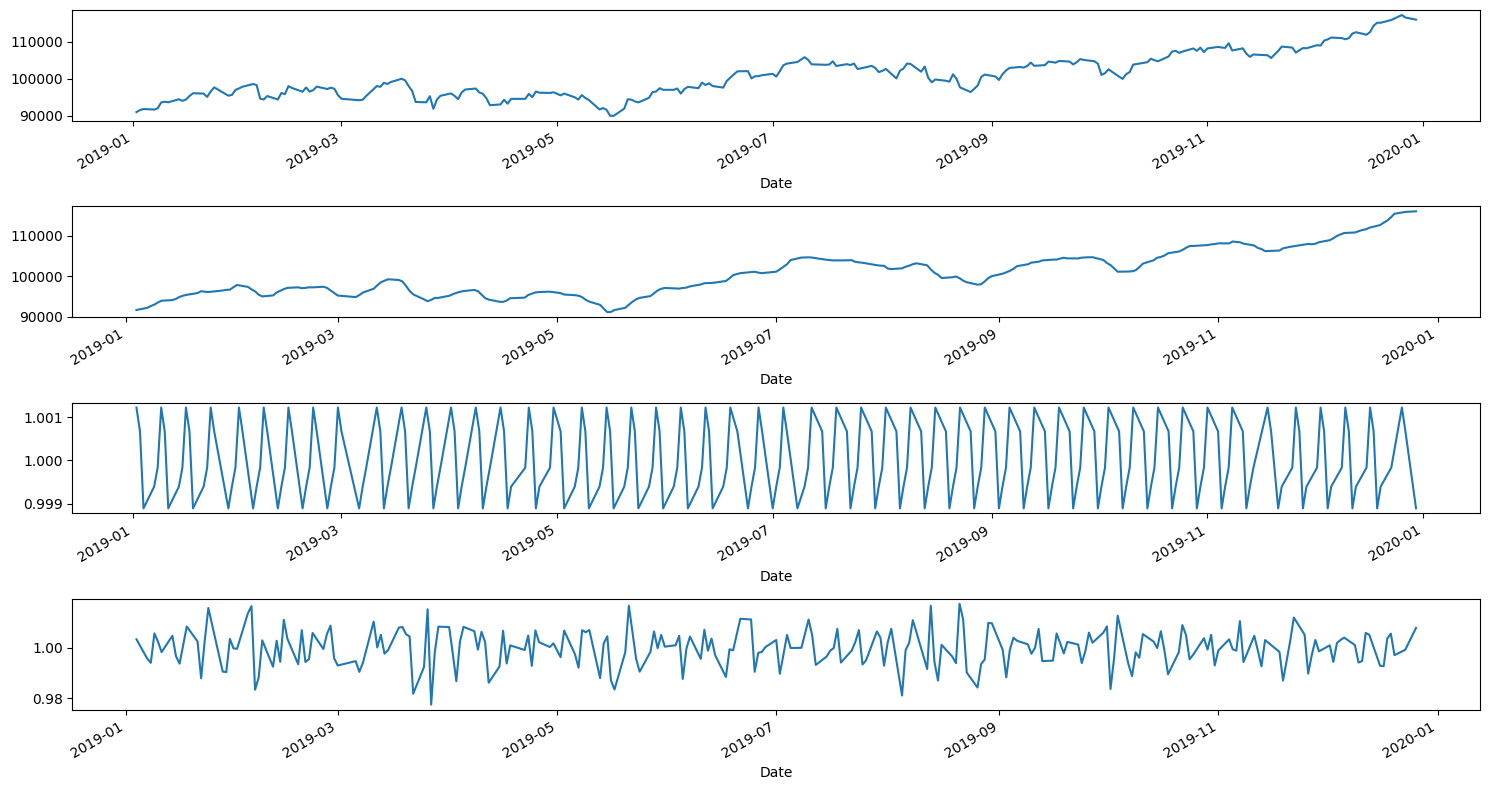

In [ ]:
# Aqui a decomposição foi realizada no ano de 2019

df_limpo = df.copy()  # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])  # transformando em datetime
df_limpo = df_limpo.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])  # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')  # definindo data como índice

# Filtrando por datas desejadas (por exemplo, de '2022-01-01' a '2022-12-31')
data_inicio = '2019-01-01'
data_fim = '2019-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

# Decomposição sazonal nos dados filtrados
seasonplot = seasonal_decompose(df_limpo_filtrado, model='multiplicative', period=5)

# Subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # Série real
seasonplot.trend.plot(ax=ax2)     # Tendência
seasonplot.seasonal.plot(ax=ax3)  # Sazonalidade
seasonplot.resid.plot(ax=ax4)     # Resíduos
plt.tight_layout()

plt.show()

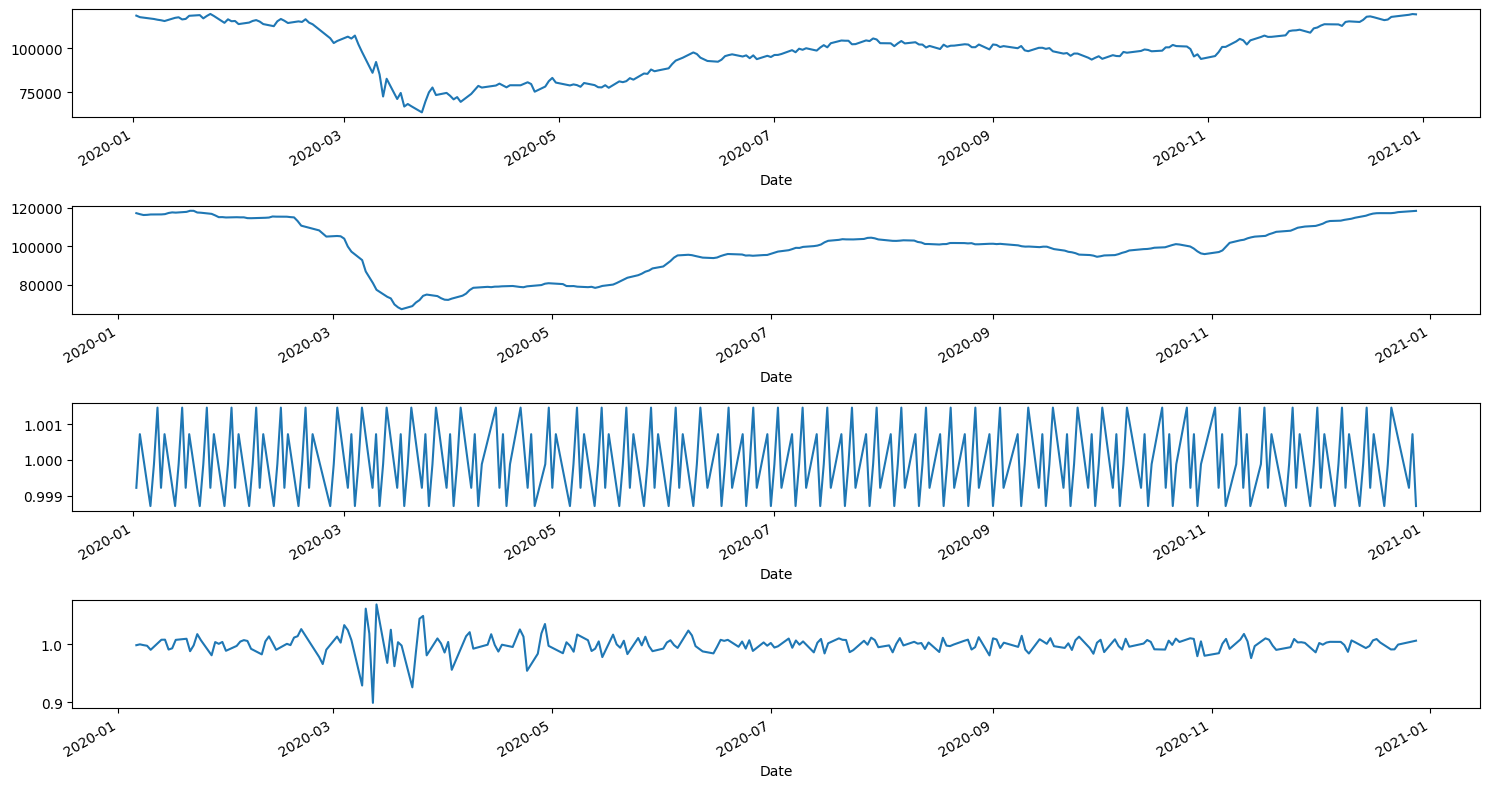

In [ ]:
# Aqui a decomposição foi realizada no ano de 2020

df_limpo = df.copy()  # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])  # transformando em datetime
df_limpo = df_limpo.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])  # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')  # definindo data como índice

# Filtrando por datas desejadas (por exemplo, de '2022-01-01' a '2022-12-31')
data_inicio = '2020-01-01'
data_fim = '2020-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

# Decomposição sazonal nos dados filtrados
seasonplot = seasonal_decompose(df_limpo_filtrado, model='multiplicative', period=5)

# Subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # Série real
seasonplot.trend.plot(ax=ax2)     # Tendência
seasonplot.seasonal.plot(ax=ax3)  # Sazonalidade
seasonplot.resid.plot(ax=ax4)     # Resíduos
plt.tight_layout()

plt.show()

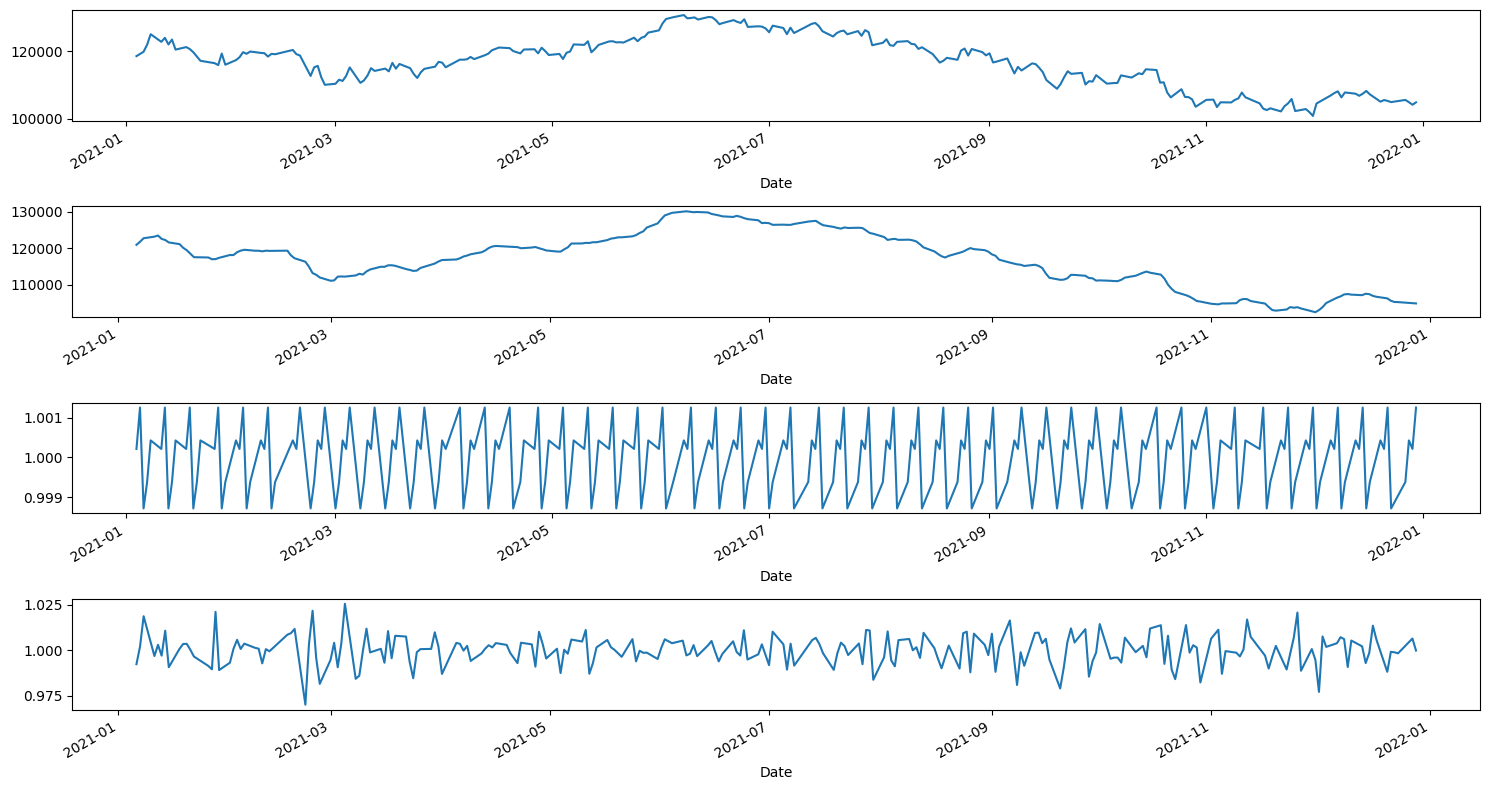

In [ ]:
# Aqui a decomposição foi realizada no ano de 2021

df_limpo = df.copy()  # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])  # transformando em datetime
df_limpo = df_limpo.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])  # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')  # definindo data como índice

# Filtrando por datas desejadas (por exemplo, de '2022-01-01' a '2022-12-31')
data_inicio = '2021-01-01'
data_fim = '2021-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

# Decomposição sazonal nos dados filtrados
seasonplot = seasonal_decompose(df_limpo_filtrado, model='multiplicative', period=5)

# Subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # Série real
seasonplot.trend.plot(ax=ax2)     # Tendência
seasonplot.seasonal.plot(ax=ax3)  # Sazonalidade
seasonplot.resid.plot(ax=ax4)     # Resíduos
plt.tight_layout()

plt.show()

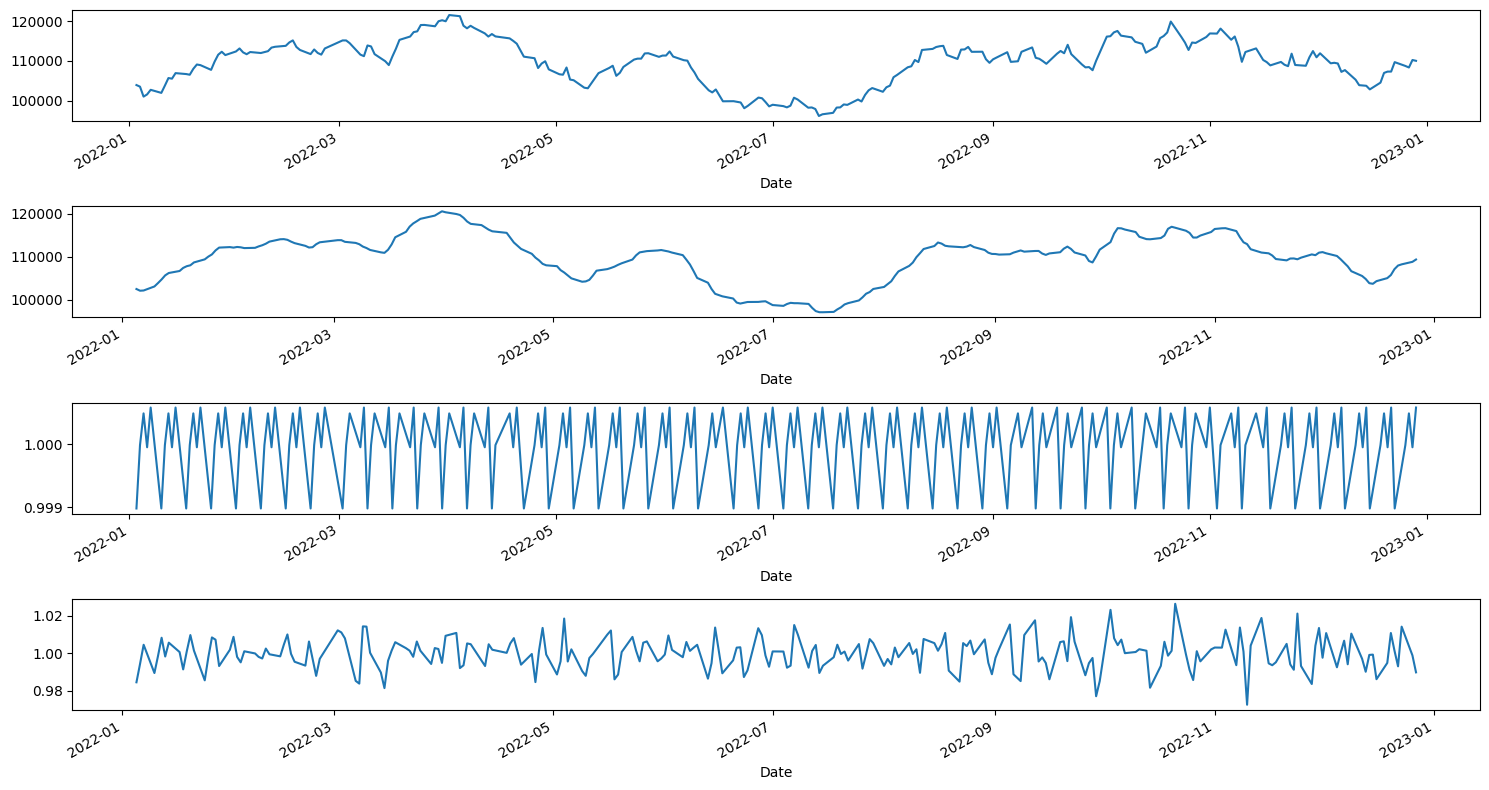

In [ ]:
# Aqui a decomposição foi realizada no ano de 2022

df_limpo = df.copy()  # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])  # transformando em datetime
df_limpo = df_limpo.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])  # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')  # definindo data como índice

# Filtrando por datas desejadas (por exemplo, de '2022-01-01' a '2022-12-31')
data_inicio = '2022-01-01'
data_fim = '2022-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

# Decomposição sazonal nos dados filtrados
seasonplot = seasonal_decompose(df_limpo_filtrado, model='multiplicative', period=5)

# Subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # Série real
seasonplot.trend.plot(ax=ax2)     # Tendência
seasonplot.seasonal.plot(ax=ax3)  # Sazonalidade
seasonplot.resid.plot(ax=ax4)     # Resíduos
plt.tight_layout()

plt.show()

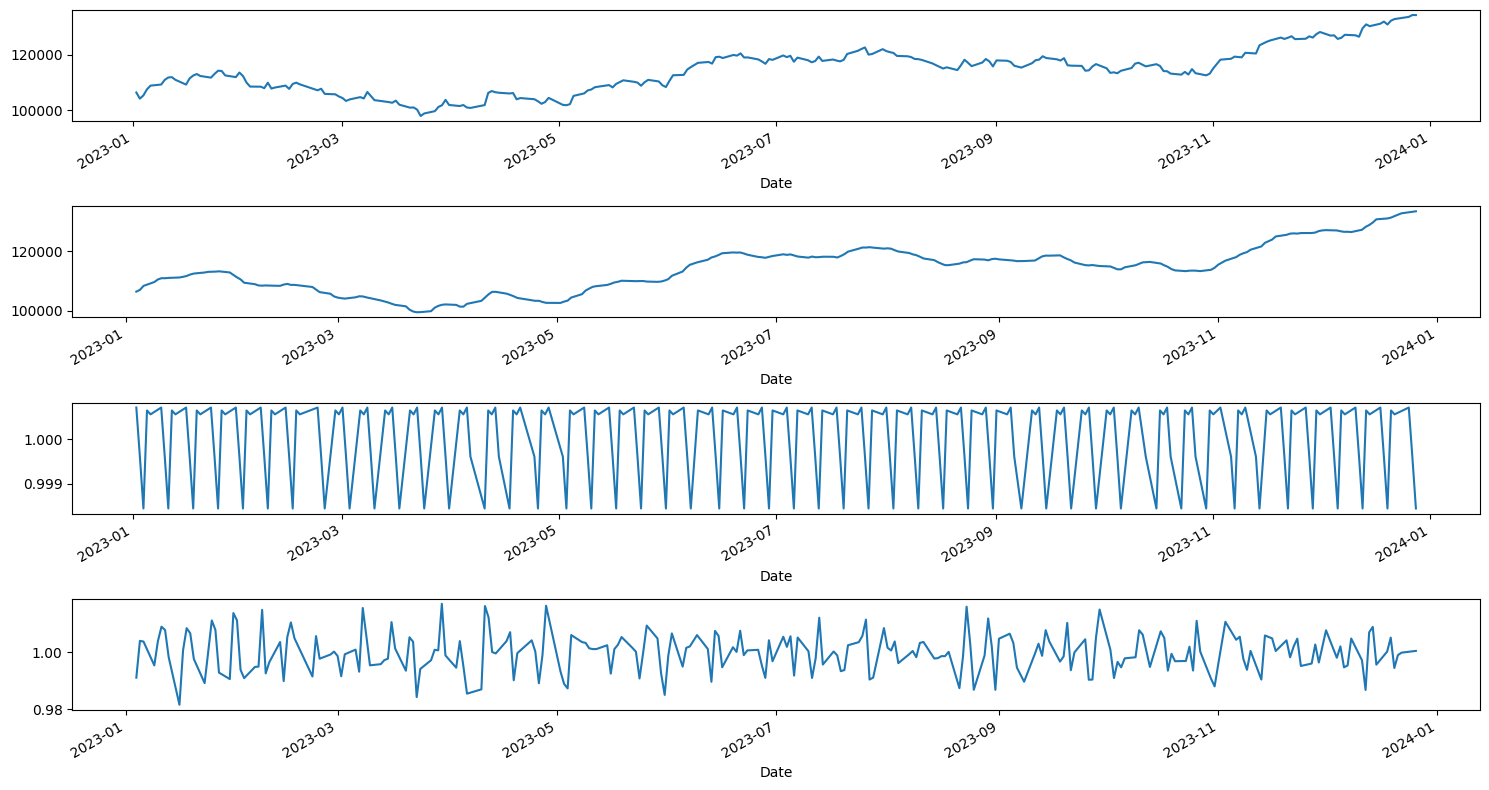

In [ ]:
# Aqui a decomposição foi realizada no ano de 2023

df_limpo = df.copy()  # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])  # transformando em datetime
df_limpo = df_limpo.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])  # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')  # definindo data como índice

# Filtrando por datas desejadas (por exemplo, de '2022-01-01' a '2022-12-31')
data_inicio = '2023-01-01'
data_fim = '2023-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

# Decomposição sazonal nos dados filtrados
seasonplot = seasonal_decompose(df_limpo_filtrado, model='multiplicative', period=5)

# Subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # Série real
seasonplot.trend.plot(ax=ax2)     # Tendência
seasonplot.seasonal.plot(ax=ax3)  # Sazonalidade
seasonplot.resid.plot(ax=ax4)     # Resíduos
plt.tight_layout()

plt.show()

 Notei que na maioria dos gráficos, há uma queda entre março e maio depois volta a subir edepois de junho

# Decomposição por semestre

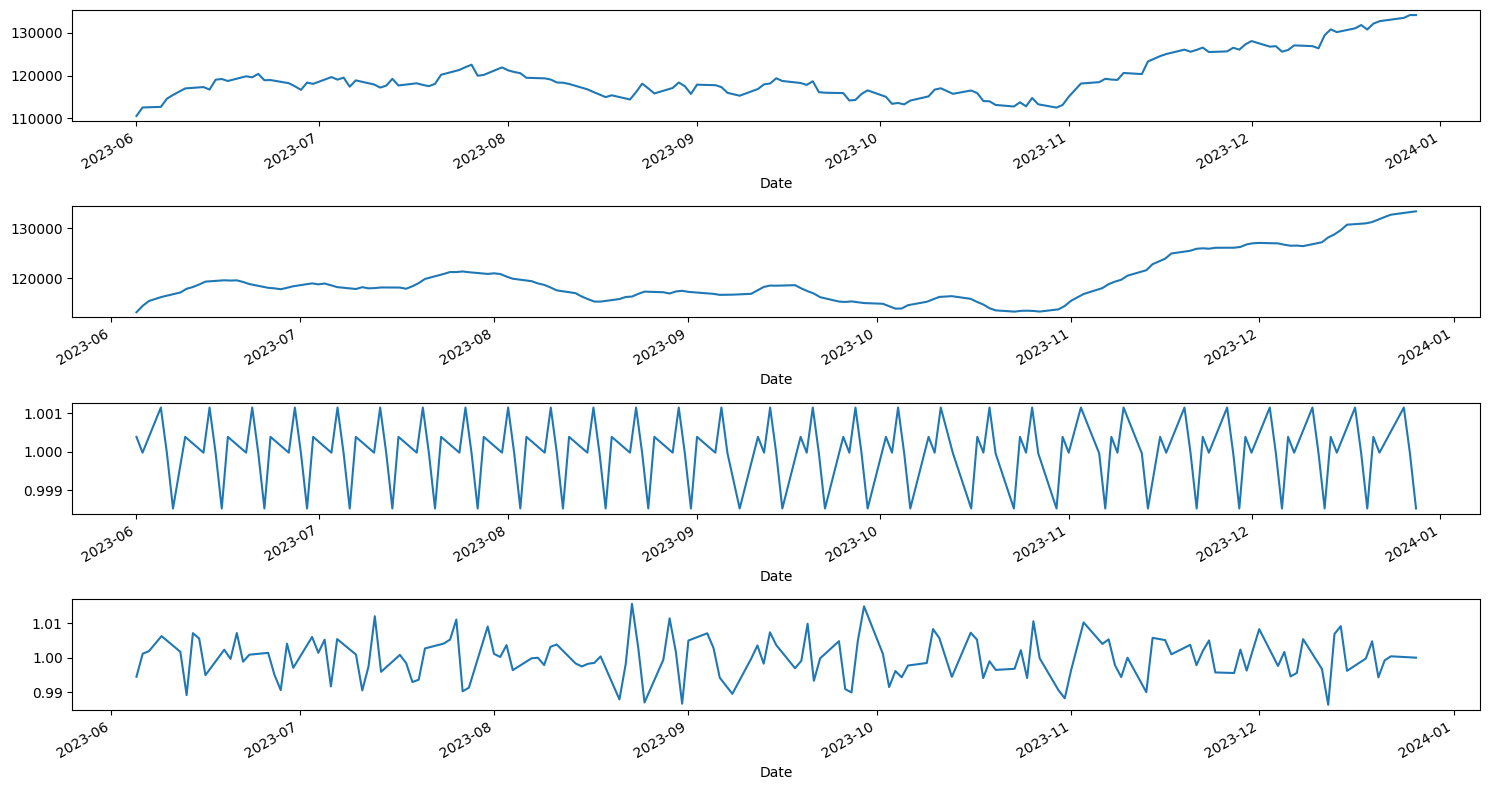

In [ ]:
# Aqui a decomposição foi realizada no Primeiro  semestre de 2023

df_limpo = df.copy()  # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])  # transformando em datetime
df_limpo = df_limpo.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])  # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')  # definindo data como índice

# Filtrando por datas desejadas (por exemplo, de '2022-01-01' a '2022-12-31')
data_inicio = '2023-06-01'
data_fim = '2023-12-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

# Decomposição sazonal nos dados filtrados
seasonplot = seasonal_decompose(df_limpo_filtrado, model='multiplicative', period=5)

# Subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # Série real
seasonplot.trend.plot(ax=ax2)     # Tendência
seasonplot.seasonal.plot(ax=ax3)  # Sazonalidade
seasonplot.resid.plot(ax=ax4)     # Resíduos
plt.tight_layout()

plt.show()

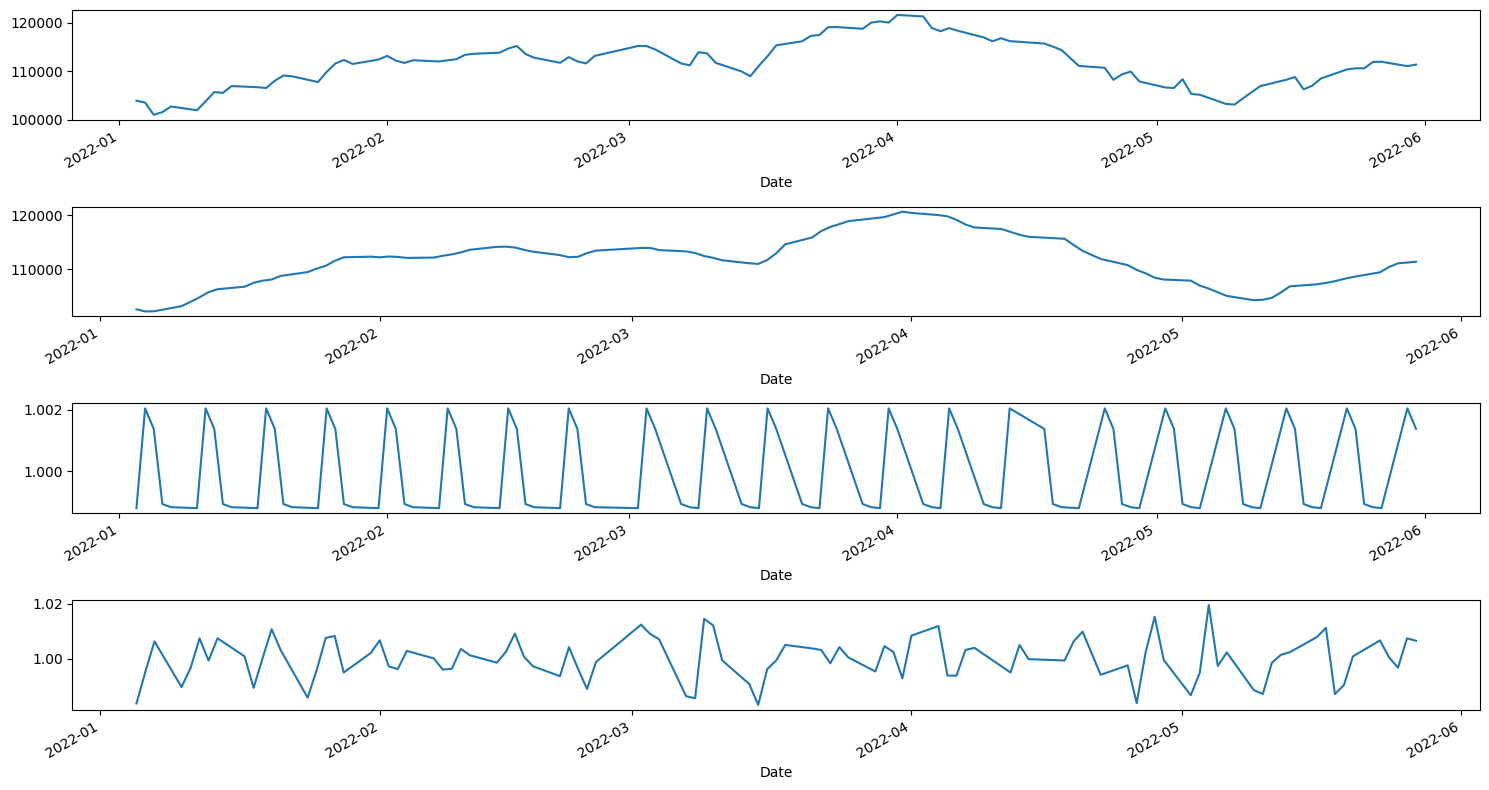

In [ ]:
# Aqui a decomposição foi realizada em ...

df_limpo = df.copy()  # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])  # transformando em datetime
df_limpo = df_limpo.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])  # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')  # definindo data como índice

# Filtrando por datas desejadas (por exemplo, de '2022-01-01' a '2022-12-31')
data_inicio = '2022-01-01'
data_fim = '2022-05-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

# Decomposição sazonal nos dados filtrados
seasonplot = seasonal_decompose(df_limpo_filtrado, model='multiplicative', period=5)

# Subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # Série real
seasonplot.trend.plot(ax=ax2)     # Tendência
seasonplot.seasonal.plot(ax=ax3)  # Sazonalidade
seasonplot.resid.plot(ax=ax4)     # Resíduos
plt.tight_layout()

plt.show()

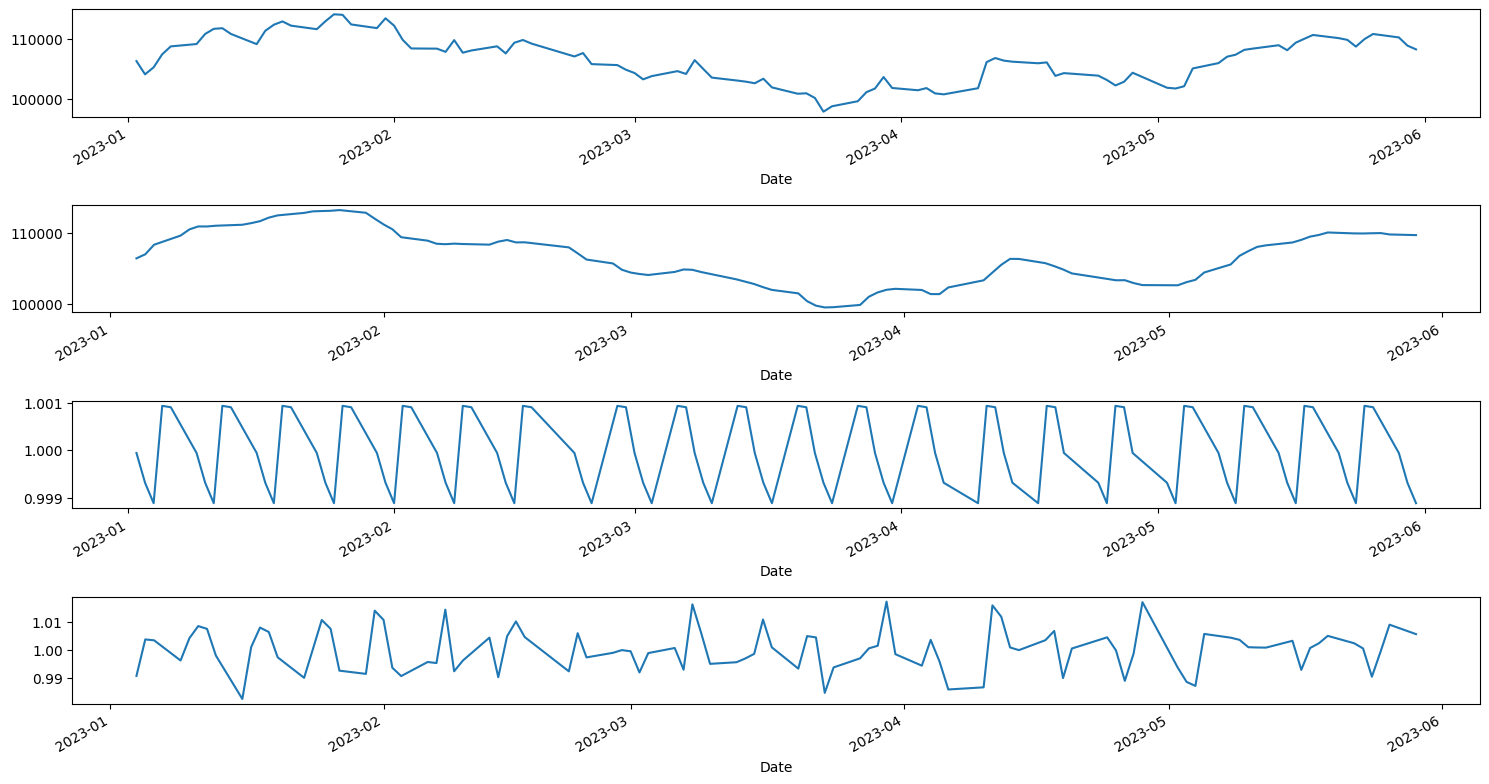

In [ ]:
# Aqui a decomposição foi realizada em ...

df_limpo = df.copy()  # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])  # transformando em datetime
df_limpo = df_limpo.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])  # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')  # definindo data como índice

# Filtrando por datas desejadas (por exemplo, de '2022-01-01' a '2022-12-31')
data_inicio = '2023-01-01'
data_fim = '2023-05-31'
df_limpo_filtrado = df_limpo.loc[data_inicio:data_fim]

# Decomposição sazonal nos dados filtrados
seasonplot = seasonal_decompose(df_limpo_filtrado, model='multiplicative', period=5)

# Subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # Série real
seasonplot.trend.plot(ax=ax2)     # Tendência
seasonplot.seasonal.plot(ax=ax3)  # Sazonalidade
seasonplot.resid.plot(ax=ax4)     # Resíduos
plt.tight_layout()

plt.show()

# Testando modelos clássicos: Média Móvel 📈⏳

Um algoritmo clássico para este tipo de problema é o da Média Móvel. Ele consiste em utilizar a média de N dias observados para prever o próximo dia. Vamos utilizar esta técnica para um N de 10 e de 20 dias.

In [18]:
#Filtrando os dados
df = pd.DataFrame(df[['Close','Date']])
df.set_index('Date', inplace=True)

In [19]:
df['MA_window_10'] = df['Close'].rolling(10).mean().shift() #média móvel em 10 dias
df['MA_window_20'] = df['Close'].rolling(20).mean().shift() #média móvel em 20 dias

#Rolling para deslocamento. Este parâmetro especifica o número de observações usadas para calcular a estatística
#shift é utilizado para deslocar o índice de DataFrame por um número especificado de períodos com uma freqüência de tempo opcional

In [20]:
df.head(20)

,Close,MA_window_10,MA_window_20
Date,,,
2018-01-02,77891.0,NaN,NaN
2018-01-03,77995.0,NaN,NaN
2018-01-04,78647.0,NaN,NaN
2018-01-05,79071.0,NaN,NaN
2018-01-08,79379.0,NaN,NaN
2018-01-09,78864.0,NaN,NaN
2018-01-10,78201.0,NaN,NaN
2018-01-11,79365.0,NaN,NaN
2018-01-12,79349.0,NaN,NaN


# Visualizando o resultado:

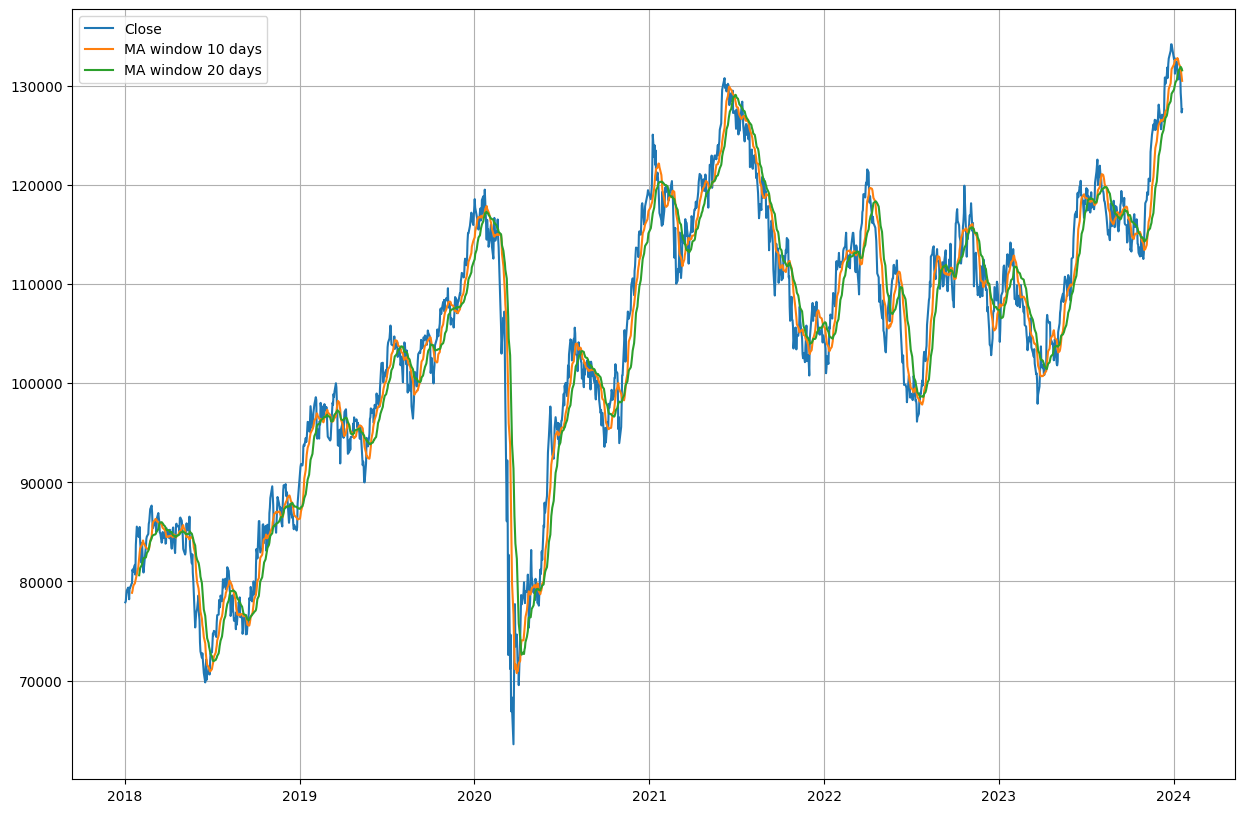

In [21]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'], label='Close')
plt.plot(df['MA_window_10'], label='MA window 10 days')
plt.plot(df['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

# Visualizando os dados mais recentes: últimos 200 dias

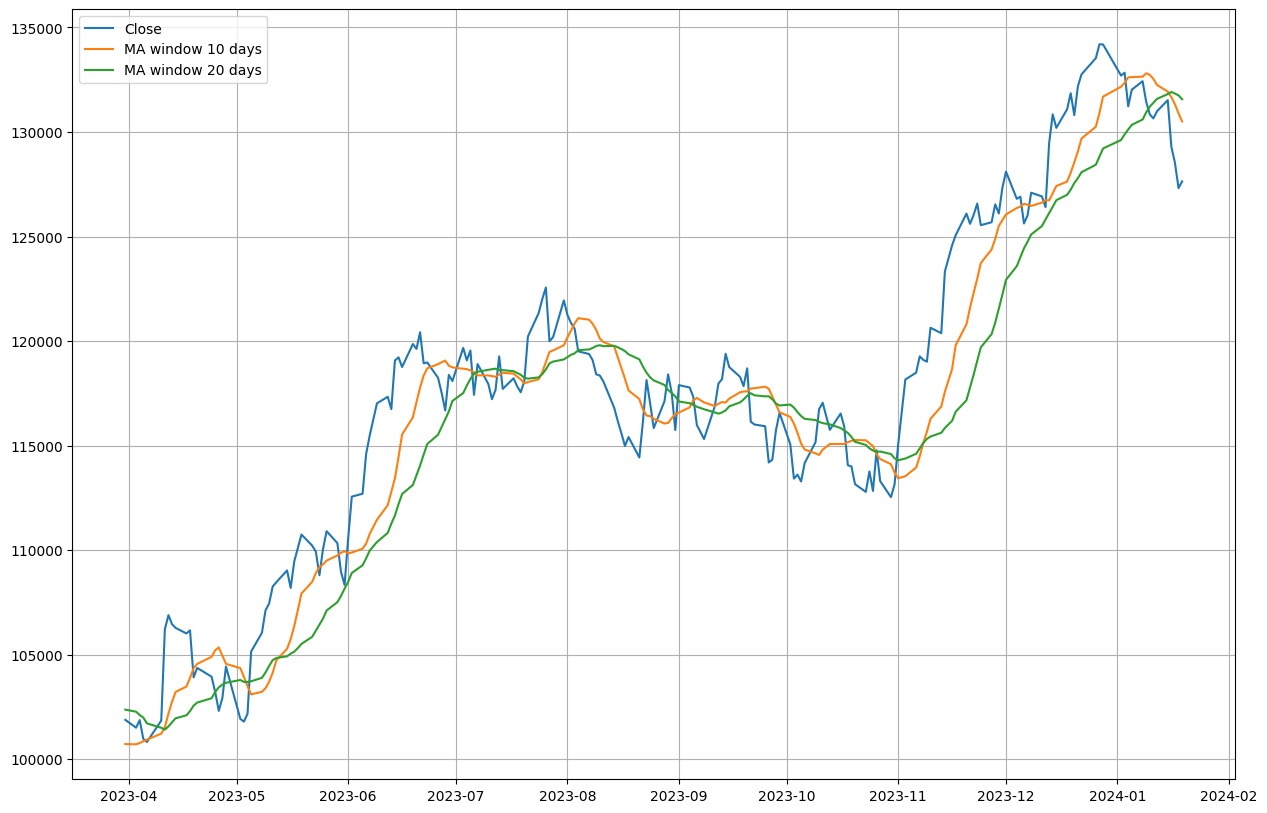

In [26]:
limit = 200

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'][-limit:], label='Close')
plt.plot(df['MA_window_10'][-limit:], label='MA window 10 days')
plt.plot(df['MA_window_20'][-limit:], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

# Prevendo os "N" dias com base na média móvel aritmética

In [27]:
df['MA_window_10_forward_10'] = np.NaN #preechendo com NaN os valores da coluna de MA_window_10_forward_10

In [28]:
def make_window(window_size, start_point):
    return [start_point+x for x in range(window_size)]  #realizando a janela de tempo

In [29]:
window_size = 10
forward_days = 10

# Iteração sobre a série temporal com uma janela deslizante
for index in range(window_size, len(df), forward_days):

    # Iteração para calcular a média móvel ponderada
    for i in range(0, forward_days):
        # Verifica se o índice atual está dentro dos limites da série temporal
        if index + i >= len(df):
            break

        # Criando duas janelas:
        # 1. Uma janela para a média móvel ('window_close')
        # 2. Uma janela para a série temporal original ('window_MA')
        window_close = make_window(window_size - i, index + i - window_size)
        window_MA = make_window(i, index)

        # Calculando a média móvel ponderada
        mean = pd.concat([df['Close'].iloc[window_close], df['MA_window_10_forward_10'].iloc[window_MA]]).mean(axis=0)

        # Atualizando o DataFrame com a média móvel ponderada
        df.iat[index + i, df.columns.get_loc('MA_window_10_forward_10')] = mean

# Plotando os dados:

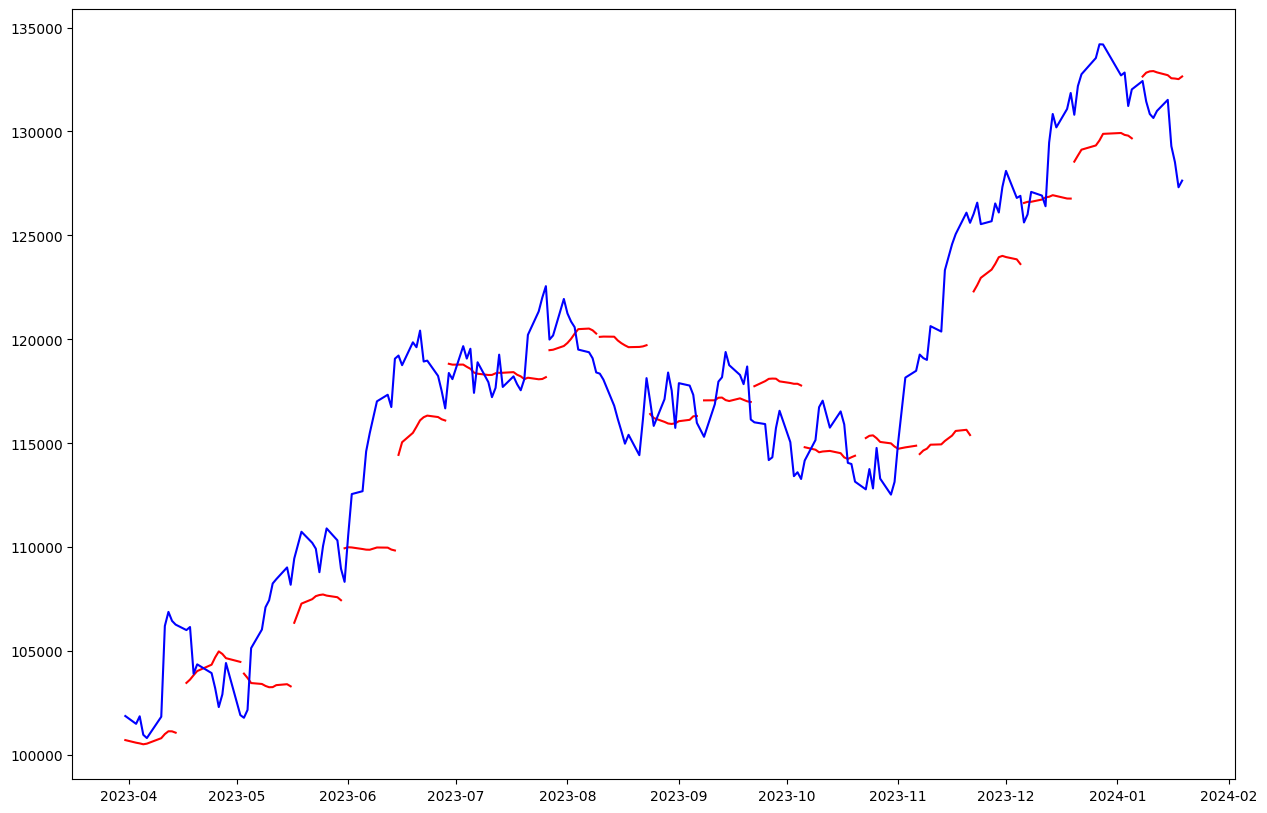

In [30]:
plt.figure(figsize = (15,10))

size = len(df)-limit - (len(df)-limit)%forward_days

for index in range(size, len(df), forward_days):
    plt.plot(df['MA_window_10_forward_10'][index:index+forward_days], color='r')

plt.plot(df['Close'][-limit:], color='b', label='Close')
#plt.legend(loc='best')
plt.show()

Note que cada reta vermelha no gráfico representa uma previsão de 10 dias, baseado nos 10 dias anteriores. Por isso elas são descontínuas.

Este tipo de abordagem é muito simplista. Isto porque o verdadeiro objetivo é prever N dias a frente para ver qual será o comportamento da ação.

# Testando o modelo ARIMA 💹

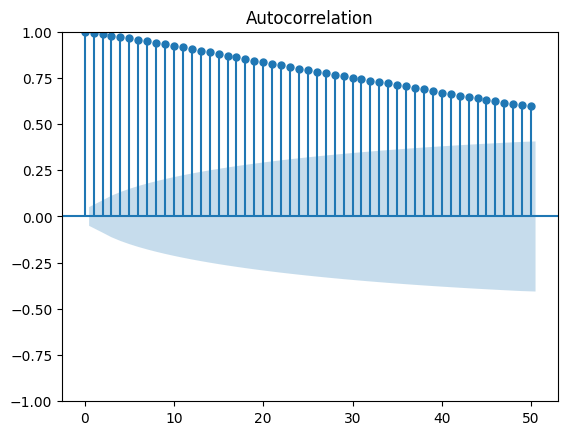

In [31]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_limpo, lags=50)
plt.show()

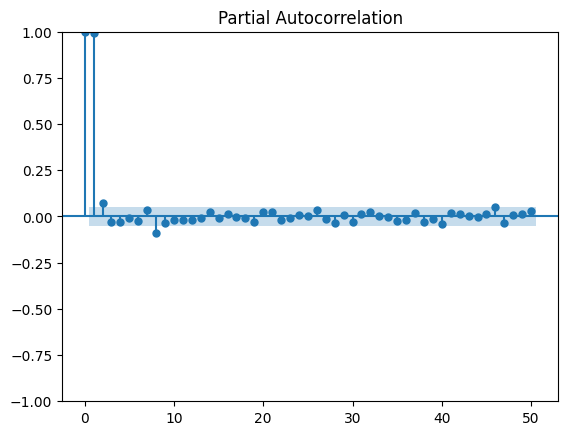

In [32]:
sm.graphics.tsa.plot_pacf(df_limpo, lags=50)
plt.show()

# Analisando a média móvel com o desvio padrão

In [33]:
rolmean = df_limpo.rolling(window=12).mean() #média móvel em 12 meses (dando a média móvel no nível anual).
rolstd = df_limpo.rolling(window=12).std()   #Desvio padrão em 12 meses
print(rolmean,rolstd)

                    Close
Date                     
2018-01-02            NaN
2018-01-03            NaN
2018-01-04            NaN
2018-01-05            NaN
2018-01-08            NaN
...                   ...
2024-01-15  132086.000000
2024-01-16  131677.666667
2024-01-17  131205.916667
2024-01-18  130757.500000
2024-01-19  130324.333333

[1500 rows x 1 columns]                   Close
Date                   
2018-01-02          NaN
2018-01-03          NaN
2018-01-04          NaN
2018-01-05          NaN
2018-01-08          NaN
...                 ...
2024-01-15  1213.195780
2024-01-16  1262.790945
2024-01-17  1297.878231
2024-01-18  1624.375656
2024-01-19  1711.056788

[1500 rows x 1 columns]


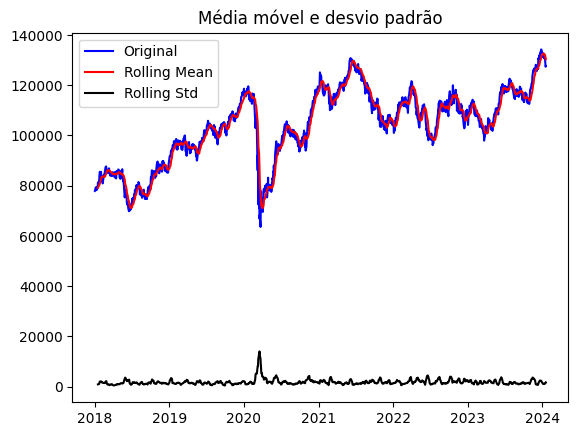

In [34]:
#Plotando a média móvel
orig = plt.plot(df_limpo, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Média móvel e desvio padrão')
plt.show(block=False)

# Teste de Dickey-Fuller ✍

In [35]:
from statsmodels.tsa.stattools import adfuller

# Teste de estacionariedade (ADF Test)
adf_result = adfuller(df_limpo['Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Resultados do Teste de Estacionariedade:')
print('--------------------------------------')
print('Teste Estatístico:', adf_result[0])
print('Valor-p:', adf_result[1])
print('Valores Críticos:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -2.315069488811165
p-value: 0.16715381309827604
Resultados do Teste de Estacionariedade:
--------------------------------------
Teste Estatístico: -2.315069488811165
Valor-p: 0.16715381309827604
Valores Críticos:
   1%: -3.434743423170358
   5%: -2.8634804142964025
   10%: -2.567803054306163


# Transformando a série e estacionária

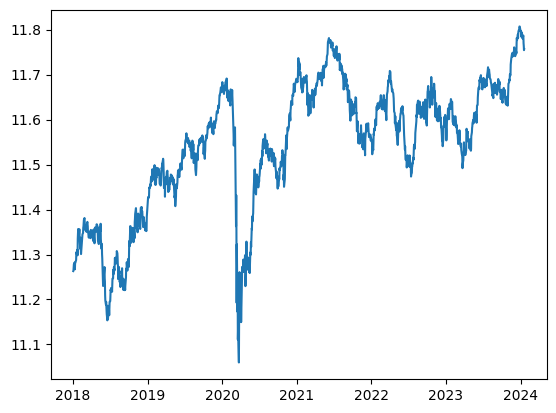

In [36]:
#Estimating trend
indexedDataset_logScale = np.log(df_limpo) #Transformação logarítma
plt.plot(indexedDataset_logScale)


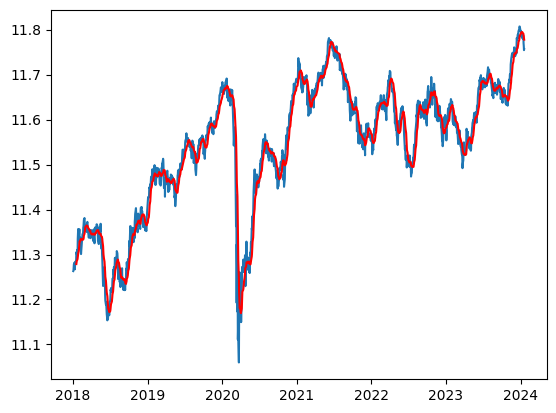

In [37]:
# Calculando a média móvel
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [38]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Close
Date,
2018-01-17,0.025775
2018-01-18,0.019765
2018-01-19,0.019557
2018-01-22,0.021996
2018-01-23,0.008037
2018-01-24,0.040174
2018-01-26,0.055290
2018-01-29,0.038852
2018-01-30,0.031092


In [39]:
# Função para testar a estacionariedade da série transformada

def test_stationarity(timeseries):

    #Determinar estatísticas contínuas
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot estatísticas contínuas
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Performance do Dickey–Fuller:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


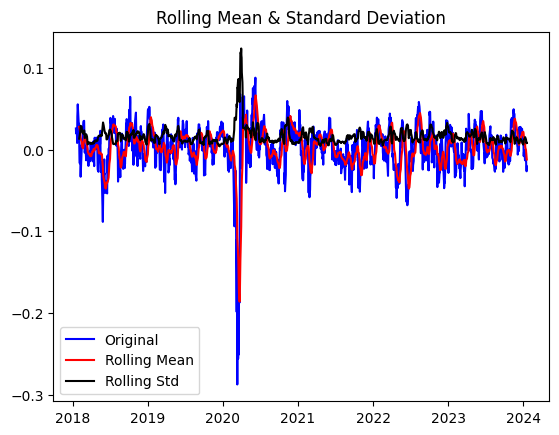

Results of Dickey Fuller Test:
Test Statistic                -9.560348e+00
p-value                        2.435384e-16
#Lags Used                     7.000000e+00
Number of Observations Used    1.481000e+03
Critical Value (1%)           -3.434773e+00
Critical Value (5%)           -2.863494e+00
Critical Value (10%)          -2.567810e+00
dtype: float64


In [40]:
test_stationarity(datasetLogScaleMinusMovingAverage)

# 2º teste : Decaimento exponencial.

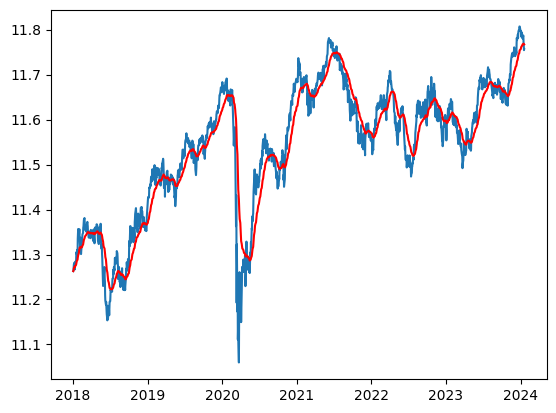

In [42]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

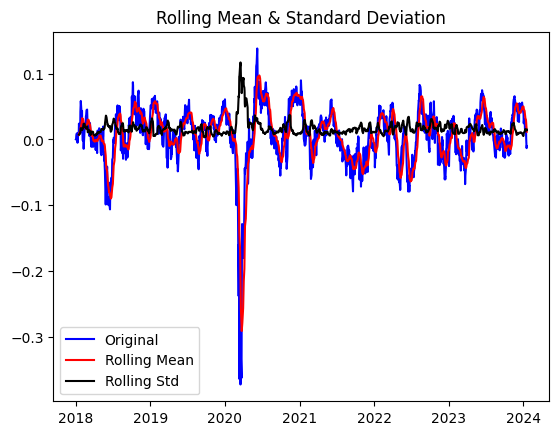

Results of Dickey Fuller Test:
Test Statistic                -6.020986e+00
p-value                        1.493961e-07
#Lags Used                     8.000000e+00
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64


In [43]:
# Subtraindo o dataset em escala logarítma pelo decaimento exponencial
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

# 3º teste : Diferenciação

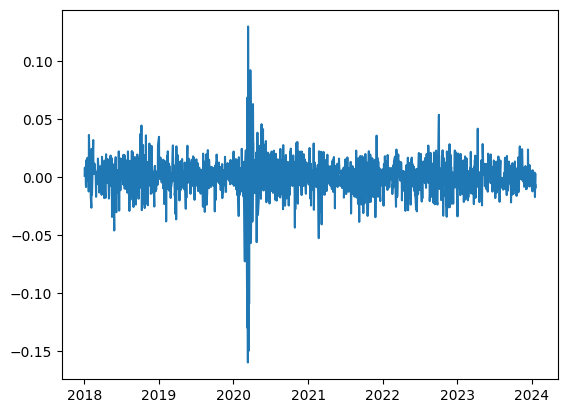

In [44]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift() #diferença entre o valor anterior e o atual
plt.plot(datasetLogDiffShifting)

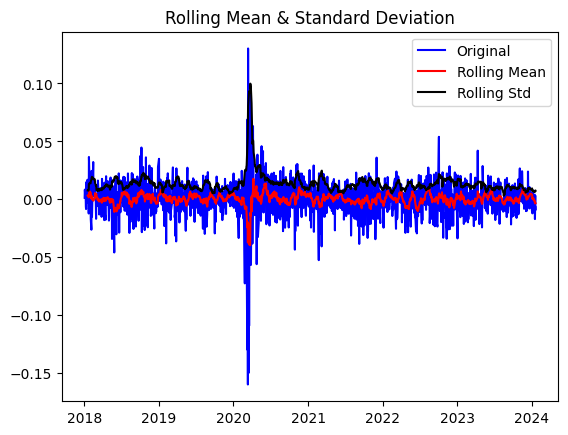

Results of Dickey Fuller Test:
Test Statistic                -1.198946e+01
p-value                        3.549075e-22
#Lags Used                     7.000000e+00
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64


In [45]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

# Teste de correlação parcial

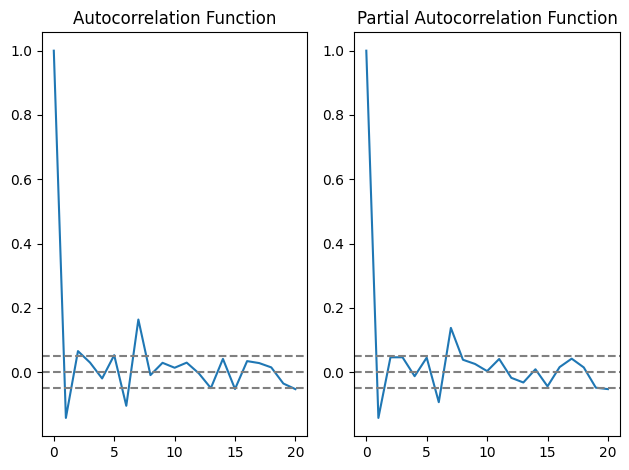

In [46]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()